# Gardening Optimization 


Homeowners who have gardens at home do not usually have an idea of what crops to grow or when to grow them. This notebook highlights the best conditions to grow 35 crops. This notebook analyzes 3500 rows of crop data and analyzes conditions such as NPK, humidity, pH, rainfall, and temperature.
We also find out which season is best to grow which crops.

In [136]:
#importing libraries
import numpy as np
import pandas as pd

#importing data visualization librairies
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [7.50, 4.50]
plt.rcParams["figure.autolayout"] = True

#importing interactive analytics
from ipywidgets import interact

In [137]:
# Importing the dataset

data = pd.read_csv("Updated_Agric_dataset.csv")

In [138]:
# Let's view the dataset

data.head(5)

,Nitrogen,Phosphorus,Potassium,temperature,humidity,ph,rainfall,label
0,185,41,275,26.113153,85.141923,6.458674,85.029794,plantain
1,184,42,268,27.479102,85.335922,5.612016,81.519789,plantain
2,192,46,257,26.110585,83.224921,6.669468,76.193598,plantain
3,188,55,234,28.846636,83.335824,6.830547,60.756861,plantain
4,152,44,208,29.014083,86.117302,5.853407,75.523305,plantain


In [139]:
# Let's view the last few rows of the data set

data.tail(5)

,Nitrogen,Phosphorus,Potassium,temperature,humidity,ph,rainfall,label
3495,156,263,135,20.663894,76.506193,6.198038,109.880173,cucumber
3496,155,264,132,24.650291,84.009861,6.698699,248.707654,cucumber
3497,158,254,134,25.338336,81.920520,6.663839,101.320589,cucumber
3498,168,272,134,25.622505,80.358088,6.373889,170.892823,cucumber
3499,158,241,134,24.169648,78.125876,6.013714,177.180539,cucumber


In [140]:
# The shape of the data set

data.shape

(3500, 8)

In [141]:
# Viewing the data types

data.dtypes

Nitrogen         int64
Phosphorus       int64
Potassium        int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [142]:
# Are there any null values in the data set?

data.isna().sum()

Nitrogen       0
Phosphorus     0
Potassium      0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [143]:
# Nice!
# Let's get an overview of all the data labels

print(data['label'].value_counts())
print("---------------------------------")
print("In total there are {} crops!".format(data['label'].value_counts().count()))


plantain       100
cotton         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
jute           100
mango          100
coffee         100
carrot         100
soyabeans      100
yam            100
beans          100
pawpaw         100
grapes         100
banana         100
tomato         100
maize          100
pepper         100
ugwu           100
potato         100
corn           100
ginger         100
rice           100
chickpea       100
pomegranate    100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
cucumber       100
Name: label, dtype: int64
---------------------------------
In total there are 35 crops!


In [144]:
# Let's view the statistics of the data set

data.describe()

,Nitrogen,Phosphorus,Potassium,temperature,humidity,ph,rainfall
count,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000
mean,82.126286,54.073429,80.985143,25.344947,70.969938,6.365678,122.287611
std,62.213992,45.113018,71.044949,4.876091,18.906241,0.684442,89.998936
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,31.000000,28.000000,25.000000,22.366162,61.781205,5.955711,65.885242
50%,74.000000,43.000000,47.000000,25.396502,73.261256,6.333639,95.246217
75%,121.000000,63.000000,152.000000,28.414823,84.843375,6.727345,143.124286
max,285.000000,279.000000,299.000000,43.675493,99.981876,9.935091,496.979333


In [146]:
@interact
def summary(crop = list(data['label'].value_counts().index)):
    x = data[data['label'] == crop]

    print("Statistics for ", crop)
    print(".................................................")
    print("The minimum to maximum Nitrogen required is {} to {}".format(x['Nitrogen'].min(), x['Nitrogen'].max()))
    print(".................................................")
    print("The minimum to maximum Phosphorus required is {} to {}".format(x['Phosphorus'].min(), x['Phosphorus'].max()))
    print(".................................................")
    print("The minimum to maximum Pottasium required is {} to {}".format(x['Potassium'].min(), x['Potassium'].max()))
    print(".................................................")
    print("The minimum to maximum Temperature required is {} to {}".format(x['temperature'].min(), x['temperature'].max()))
    print(".................................................")
    print("The minimum to maximum Humidity required is {} to {}".format(x['humidity'].min(), x['humidity'].max()))
    print(".................................................")
    print("The minimum to maximum Rainfall requird is {} to {}".format(x['rainfall'].min(), x['rainfall'].max()))


interactive(children=(Dropdown(description='crop', options=('plantain', 'cotton', 'watermelon', 'muskmelon', '…

In [147]:
#Let's check crops that require high and low of each resource

@interact
def compare(resources = ['Nitrogen', 'Phosphorus', 'Potassium', 'temperature', 'ph', 'humidity', 'rainfall']):
    print("Crop Statistics")
    print("......................................................")
    print("Crops that require high {} (higher than average {})".format(resources, resources))
    print(data[data[resources] >= data[resources].mean()]['label'].unique())
    print("......................................................")
    print("Crops that require low {} (lower than average {})".format(resources, resources))
    print(data[data[resources] < data[resources].mean()]['label'].unique())



interactive(children=(Dropdown(description='resources', options=('Nitrogen', 'Phosphorus', 'Potassium', 'tempe…

## Descriptive Analytics

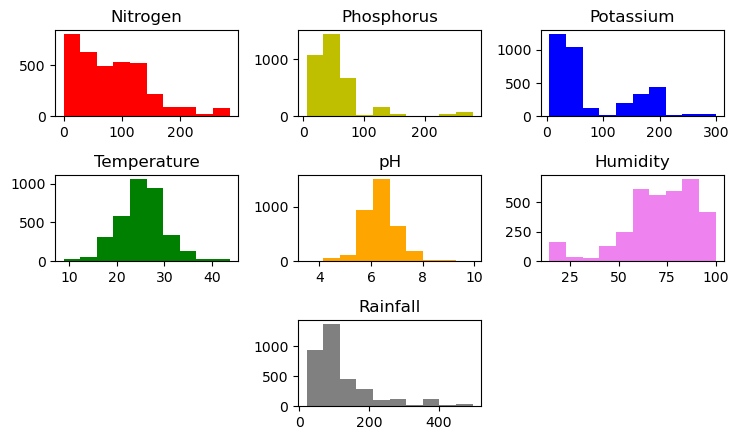

In [148]:
# We create histograms to view the distribution of each condition

fig,ax = plt.subplots(3,3)

ax[0,0].hist(data['Nitrogen'], bins= 10, color='r')
ax[0,0].set_title('Nitrogen')

ax[0,1].hist(data['Phosphorus'], bins= 10, color='y')
ax[0,1].set_title('Phosphorus')

ax[0,2].hist(data['Potassium'], bins= 10, color='b')
ax[0,2].set_title('Potassium')

ax[1,0].hist(data['temperature'], bins= 10, color='g')
ax[1,0].set_title('Temperature')

ax[1,1].hist(data['ph'], bins= 10, color='orange')
ax[1,1].set_title('pH')

ax[1,2].hist(data['humidity'], bins= 10, color='violet')
ax[1,2].set_title('Humidity')

ax[2,1].hist(data['rainfall'], bins= 10, color='grey')
ax[2,1].set_title('Rainfall')

fig.delaxes(ax[2,0])
fig.delaxes(ax[2,2])

plt.show()


#### Insights from the plot

1. Most of the crops require Nitrogen in amounts ranging from 0 to 150
2. Most of the crops require Phosphorus in amounts ranging from 0 to 80
3. Most of the crops require Potassium in amounts ranging from 0 to 70
4. Most of the crops average temperature weather from 25 to 29 degree celcius
5. Most of the crops prefer a neutral pH of 6.5 to 7 
6. Most crops grow better in humid environments ranging from 65 to 100
7. Very few crops require very high amounts of rainfall

To get more insights, let's view crops that are at the very extremes of each condition.

In [152]:
# Insights into the data set

print("The crop that requires the highest amount of Nitrogen", data[data['Nitrogen'] >= 200]['label'].unique())
print("The crop that requires the lowest amount of Nitrogen", data[data['Nitrogen'] < 1]['label'].unique())
print("...................................................................................................")
print("The crop that requires the highest amount of Phosphorus", data[data['Phosphorus'] >= 200]['label'].unique())
print("The crop that requires the lowest amount of Phosphorus", data[data['Phosphorus'] < 7]['label'].unique())
print("...................................................................................................")
print("The crop that requires the highest amount of Pottasium", data[data['Potassium'] >= 250]['label'].unique())
print("The crop that requires the lowest amount of Pottasium", data[data['Potassium'] < 5 ]['label'].unique())
print("...................................................................................................")
print("The crop that requires the highest temperatures", data[data['temperature'] >= 40]['label'].unique())
print("The crop that requires the lowest temperatures", data[data['temperature'] < 9]['label'].unique())
print("...................................................................................................")
print("The crop that requires the highest amount of humidity", data[data['humidity'] >= 95]['label'].unique())
print("The crop that requires the lowest amount of humidity", data[data['humidity'] < 20]['label'].unique())
print("...................................................................................................")
print("The crop that requires the highest amount of pH", data[data['ph'] >= 9]['label'].unique())
print("The crop that requires the lowest amount of pH", data[data['ph'] < 5]['label'].unique())
print("...................................................................................................")
print("The crop that requires the highest amount of rainfall", data[data['rainfall'] >= 400]['label'].unique())
print("The crop that requires the lowest amount of rainfall", data[data['rainfall'] < 40]['label'].unique())
print("...................................................................................................")


The crop that requires the highest amount of Nitrogen ['soyabeans' 'yam']
The crop that requires the lowest amount of Nitrogen ['kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean' 'lentil' 'pomegranate'
 'mango' 'grapes' 'apple' 'orange' 'coconut']
...................................................................................................
The crop that requires the highest amount of Phosphorus ['cucumber']
The crop that requires the lowest amount of Phosphorus ['pomegranate' 'watermelon' 'muskmelon' 'orange' 'coconut']
...................................................................................................
The crop that requires the highest amount of Pottasium ['plantain']
The crop that requires the lowest amount of Pottasium []
...................................................................................................
The crop that requires the highest temperatures ['grapes' 'papaya']
The crop that requires the lowest temperatures ['grapes']
..................

In Nigeria, there are two seasons: Dry season and rainy season

Rainy season lasts from April till October, with temperature range of 21 to 32 degree celcius, high rainfall, and high humidity.

Dry season lasts from November till March, with a temperature range of 25 to 32 degree celcius, low rainfall, and low humidity.

Let's view crops that are grown during each season.

In [153]:
#Analysing data

print("Crops that are suitable for rainy season (April till October) are: ")
print(data[(data['temperature'] >= 25) & (data['temperature'] <= 32) & (data['rainfall'] > 117) & (data['humidity'] > 69)]['label'].unique())
print(".........................................................................")
print("Crops that are suitable for dry season (November till March) are: ")
print(data[(data['temperature'] >= 19) & (data['temperature'] <= 30) & (data['rainfall'] < 64) & (data['humidity'] < 50)]['label'].unique())


Crops that are suitable for rainy season (April till October) are: 
['rice' 'banana' 'orange' 'papaya' 'coconut' 'jute' 'coffee' 'yam' 'beans'
 'pawpaw' 'cucumber']
.........................................................................
Crops that are suitable for dry season (November till March) are: 
['potato' 'kidneybeans' 'mothbeans']


## Building the model

1. We use K Means clustering to divide the dataset into clusters. The clusters help us determine the crops that could typically be grown with the same range of conditions or the same partition in your garden.

2. We go ahead to build a logistic regression predictive model to decide the best crops for certain given conditions.


In [154]:
from sklearn.cluster import KMeans

#dropping the label column from the data
X = data.drop(['label'], axis=1)
X = X.values


# Selecting optimum number of clusters using the elbow method (WSS-Within group Sum of Squares Plot)

wss = []
for k in range(1,11):
    km = KMeans(n_clusters=k, init = 'k-means++', max_iter = 2000, n_init = 10, random_state = 42)
    km = km.fit(X)
    wss.append(km.inertia_)

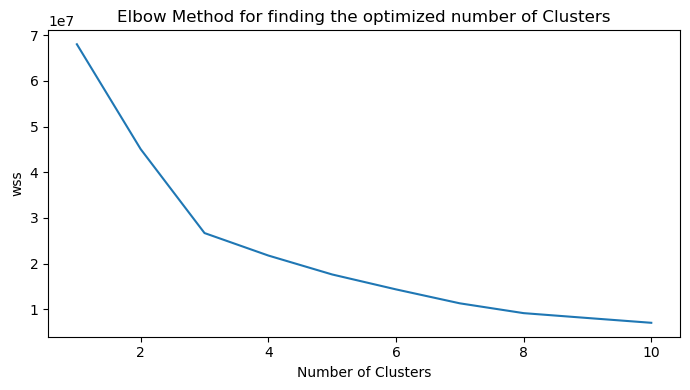

In [155]:
# plotting the sum of squared distances wss

plt.rcParams['figure.figsize'] = 7,4
plt.plot(range(1,11),wss)
plt.title('Elbow Method for finding the optimized number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('wss')
plt.show()



### Implementing KMeans Algorithm

In [158]:
# The number of clusters for optimization is 4

km= KMeans(n_clusters= 3, init = 'k-means++', max_iter = 2000, n_init = 10, random_state = 42)
y_clust = km.fit_predict(X)


#Finding the results

Y= data['label']
y_clust= pd.DataFrame(y_clust)

result = pd.concat([y_clust, Y], axis=1)
result =  result.rename(columns= {0:'cluster'})

#Checking the the clusters
print('Crops in the first cluster: ', result[result['cluster'] == 0]['label'].unique())
print('Crops in the second cluster: ', result[result['cluster'] == 1]['label'].unique())
print('Crops in the third cluster: ', result[result['cluster'] == 2]['label'].unique())



Crops in the first cluster:  ['rice' 'soyabeans' 'yam' 'beans']
Crops in the second cluster:  ['ginger' 'rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango'
 'watermelon' 'muskmelon' 'orange' 'papaya' 'coconut' 'cotton' 'jute'
 'coffee' 'pawpaw']
Crops in the third cluster:  ['plantain' 'tomato' 'pepper' 'ugwu' 'potato' 'corn' 'grapes' 'apple'
 'carrot' 'cucumber']


### Predictive modelling

In [165]:
# importing libraries

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


# preparing data
y= data['label']
X= data.drop(['label'], axis = 1)

# splitting data into test and training dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.33, random_state= 0)

#Building prediction model

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  #applying scaling on each x training data
X_test_scaled = scaler.transform(X_test)    #applying scaling on each x test data

model= LogisticRegression(max_iter=150)
model.fit(X_train_scaled, y_train)  
y_pred= model.predict(X_test_scaled)


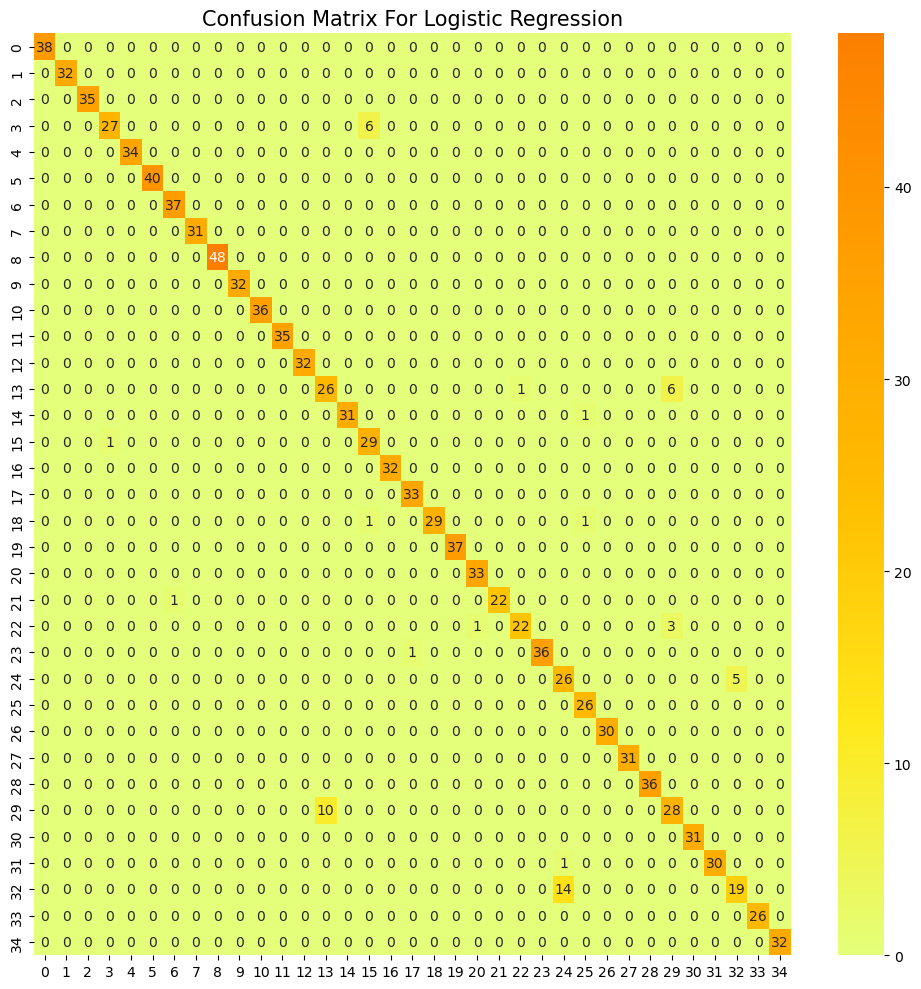

In [166]:
#Evaluating the model performance
from sklearn.metrics import confusion_matrix

#Printing the Confusing Matrix
plt.rcParams['figure.figsize'] = (10,10)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, cmap = 'Wistia')
plt.title('Confusion Matrix For Logistic Regression', fontsize = 15)
plt.show()

In [167]:
#Defining the classification Report
from sklearn.metrics import classification_report

#Printing the Classification Report
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        38
      banana       1.00      1.00      1.00        32
       beans       1.00      1.00      1.00        35
   blackgram       0.96      0.82      0.89        33
      carrot       1.00      1.00      1.00        34
    chickpea       1.00      1.00      1.00        40
     coconut       0.97      1.00      0.99        37
      coffee       1.00      1.00      1.00        31
        corn       1.00      1.00      1.00        48
      cotton       1.00      1.00      1.00        32
    cucumber       1.00      1.00      1.00        36
      ginger       1.00      1.00      1.00        35
      grapes       1.00      1.00      1.00        32
        jute       0.72      0.79      0.75        33
 kidneybeans       1.00      0.97      0.98        32
      lentil       0.81      0.97      0.88        30
       maize       1.00      1.00      1.00        32
       mango       0.97    